# Вебинар 3. Визуализация и анализ данных.

**Подключение библиотек и скриптов**

In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.image as img
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
matplotlib.rcParams.update({'font.size': 14})  # размер шрифта на графиках

**Пути к директориям и файлам**

In [3]:
PREPARED_DATASET_PATH = './housing_prepared.csv'
CALIFORNIA_MAP_PATH = 'California_Map.png'

### Загрузка данных

**Описание датасета**

Статистические данные о ряде домов в Калифорнии, основанные на переписи 1990 года.

* **longitude** - долгота
* **latitude** - широта
* **housing_median_age** - средний возраст дома
* **total_rooms** - общее количество комнат
* **total_bedrooms** - общее количество спален
* **population** - количество проживающих
* **households** - домохозяйства
* **ocean_proximity** - близость океана
* **median_income** - средний доход
* **median_house_value** - средняя стоимость дома

In [4]:
df = pd.read_csv(PREPARED_DATASET_PATH)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id,bedroom_share,population_per_room,-,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,14.659091,0.365909,0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,1,15.579659,0.338217,0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,2,12.951602,0.338105,0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,3,18.445840,0.437991,0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,4,17.209588,0.347265,0,0,0,0,1,0


In [5]:
df.dtypes

longitude              float64
latitude               float64
housing_median_age     float64
total_rooms            float64
total_bedrooms         float64
population             float64
households             float64
median_income          float64
median_house_value     float64
ocean_proximity         object
id                       int64
bedroom_share          float64
population_per_room    float64
-                        int64
<1H OCEAN                int64
INLAND                   int64
ISLAND                   int64
NEAR BAY                 int64
NEAR OCEAN               int64
dtype: object

### Уменьшение объема памяти, который занимает датасет**

https://www.kaggle.com/gemartin/load-data-reduce-memory-usage

In [6]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
#                 if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
#                     df[col] = df[col].astype(np.float16)
#                 elif

                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [7]:
df = reduce_mem_usage(df)

Memory usage of dataframe is 2.99 MB
Memory usage after optimization is: 1.04 MB
Decreased by 65.1%


In [8]:
df.dtypes

longitude               float32
latitude                float32
housing_median_age      float32
total_rooms             float32
total_bedrooms          float32
population              float32
households              float32
median_income           float32
median_house_value      float32
ocean_proximity        category
id                        int16
bedroom_share           float32
population_per_room     float32
-                          int8
<1H OCEAN                  int8
INLAND                     int8
ISLAND                     int8
NEAR BAY                   int8
NEAR OCEAN                 int8
dtype: object

---

# 1. Распределение целевой переменной

- Помните про различие среднего арифметическое, медианы, моды
- Среднее арифметическое (мат ожидание) подходят для нормальных распрделний = SUM / N
- Медиана (quantile 50%) - практически для любых распределений = Середина отранжированного ряда
- Мода - для категориальных переменных = наиболее часто встречающееся значение в выборке

In [9]:
x = np.array([0,0,0,0,0,0,1])
np.quantile(x, q=0.5)

0.0

Пока не рассматриваем зависимость целевой переменной от фичей

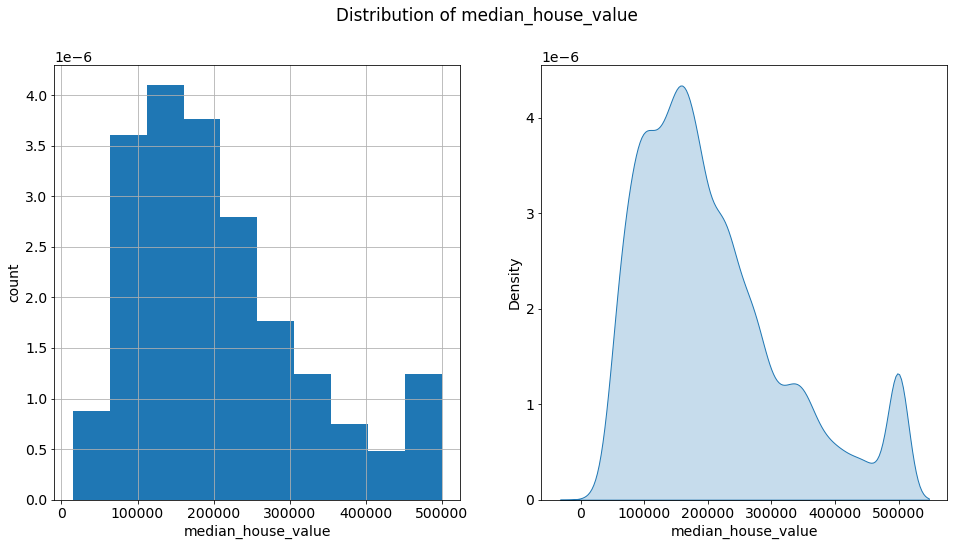

In [10]:
plt.figure(figsize = (16, 8))

plt.subplot(121)
df['median_house_value'].hist(density=True)  # density=True  # shift + Tab = спарвка по функции
plt.ylabel('count')
plt.xlabel('median_house_value')

plt.subplot(122)
sns.kdeplot(df['median_house_value'], shade=True, legend=False)
plt.xlabel('median_house_value')

plt.suptitle('Distribution of median_house_value')
plt.show()

In [11]:
target_mean = round(df['median_house_value'].mean(), 2)
target_median = df['median_house_value'].median()
target_mode = df['median_house_value'].mode()[0]

target_mean, target_median, target_mode

(206854.97, 179700.0, 500001.0)

C:\Users\mas10\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


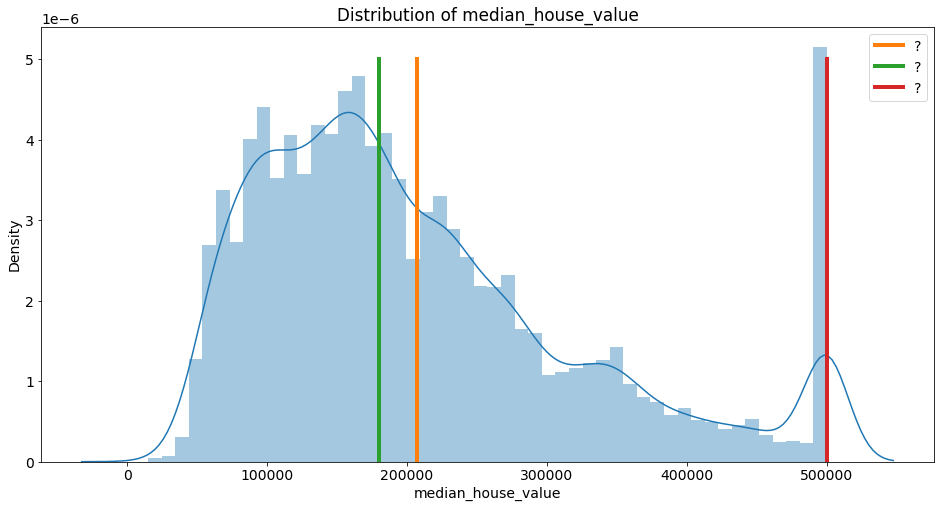

In [12]:
plt.figure(figsize = (16, 8))

sns.distplot(df['median_house_value'], bins=50)

y = np.linspace(0, 0.000005, 100)
plt.plot([target_mean] * 100, y, label='?',  linewidth=4)
plt.plot([target_median] * 100, y, label='?',  linewidth=4)
plt.plot([target_mode] * 100, y, label='?', linewidth=4)

plt.title('Distribution of median_house_value')
plt.legend()
plt.show()

In [13]:
# target_mean, target_median, target_mode

C:\Users\mas10\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


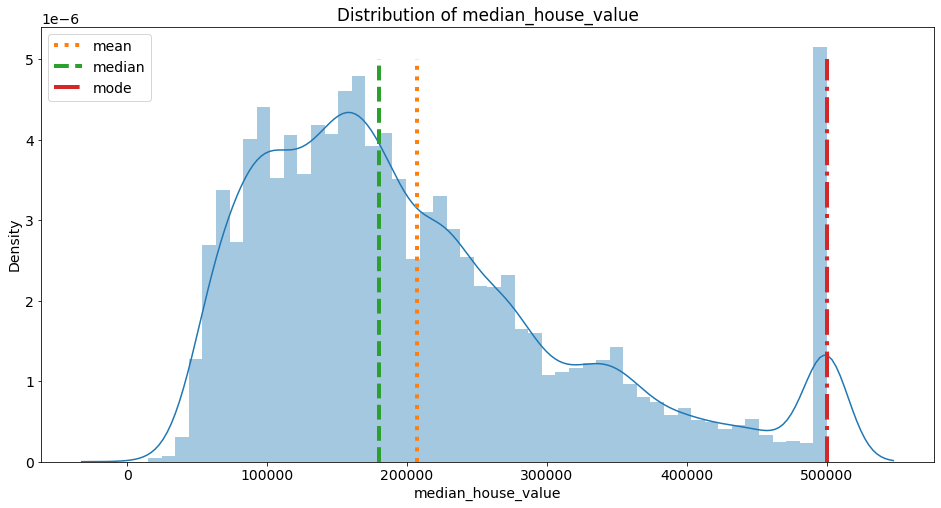

In [14]:
plt.figure(figsize = (16, 8))

sns.distplot(df['median_house_value'], bins=50)

y = np.linspace(0, 0.000005, 100)
plt.plot([target_mean] * 100, y, label='mean', linestyle=':', linewidth=4)
plt.plot([target_median] * 100, y, label='median', linestyle='--', linewidth=4)
plt.plot([target_mode] * 100, y, label='mode', linestyle='-.', linewidth=4)

plt.title('Distribution of median_house_value')
plt.legend()
plt.show()

(!) **Визуально** мода будет отличаться при разном количестве bins

Мода - мера "среднего" для категориальных признаков

In [15]:
target_bins = df['median_house_value'] // 10000 * 10000
# 0 - 10000 --> 0
# 10001 - 20000 --> 1
# ...

target_adjusted_mode = target_bins.mode()[0]

target_adjusted_mode

160000.0

In [16]:
np.unique(target_bins)

array([ 10000.,  20000.,  30000.,  40000.,  50000.,  60000.,  70000.,
        80000.,  90000., 100000., 110000., 120000., 130000., 140000.,
       150000., 160000., 170000., 180000., 190000., 200000., 210000.,
       220000., 230000., 240000., 250000., 260000., 270000., 280000.,
       290000., 300000., 310000., 320000., 330000., 340000., 350000.,
       360000., 370000., 380000., 390000., 400000., 410000., 420000.,
       430000., 440000., 450000., 460000., 470000., 480000., 490000.,
       500000.], dtype=float32)

C:\Users\mas10\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


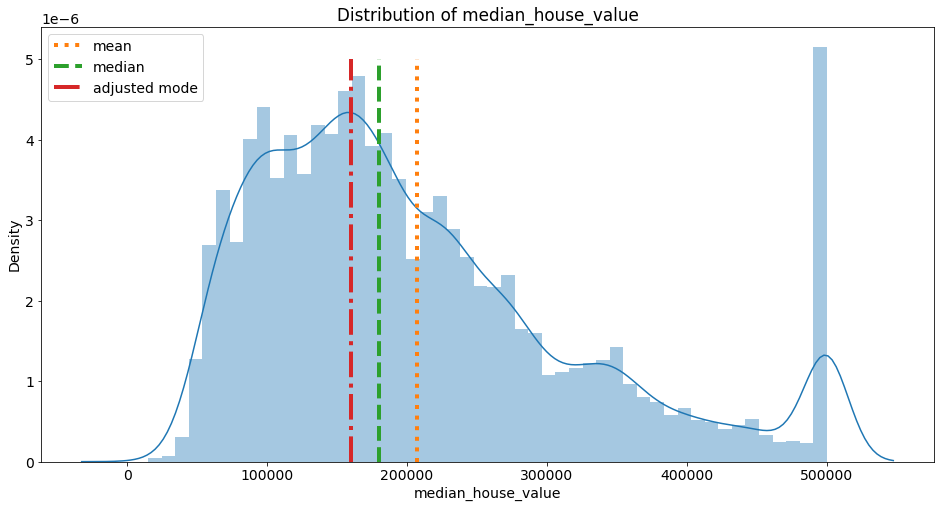

In [17]:
plt.figure(figsize = (16, 8))

sns.distplot(df['median_house_value'], bins=50) 

y = np.linspace(0, 0.000005, 100)
plt.plot([target_mean] * 100, y, label='mean', linestyle=':', linewidth=4)
plt.plot([target_median] * 100, y, label='median', linestyle='--', linewidth=4)
plt.plot([target_adjusted_mode] * 100, y, label='adjusted mode', linestyle='-.', linewidth=4)

plt.title('Distribution of median_house_value')
plt.legend()
plt.show()

# 2. Анализ признаков

Пока не рассматриваем их влияние на таргет

### 2.1 Количественные признаки

In [18]:
df_num_features = df.select_dtypes(include=['float64', 'float32'])
df_num_features.drop('median_house_value', axis=1, inplace=True)

C:\Users\mas10\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


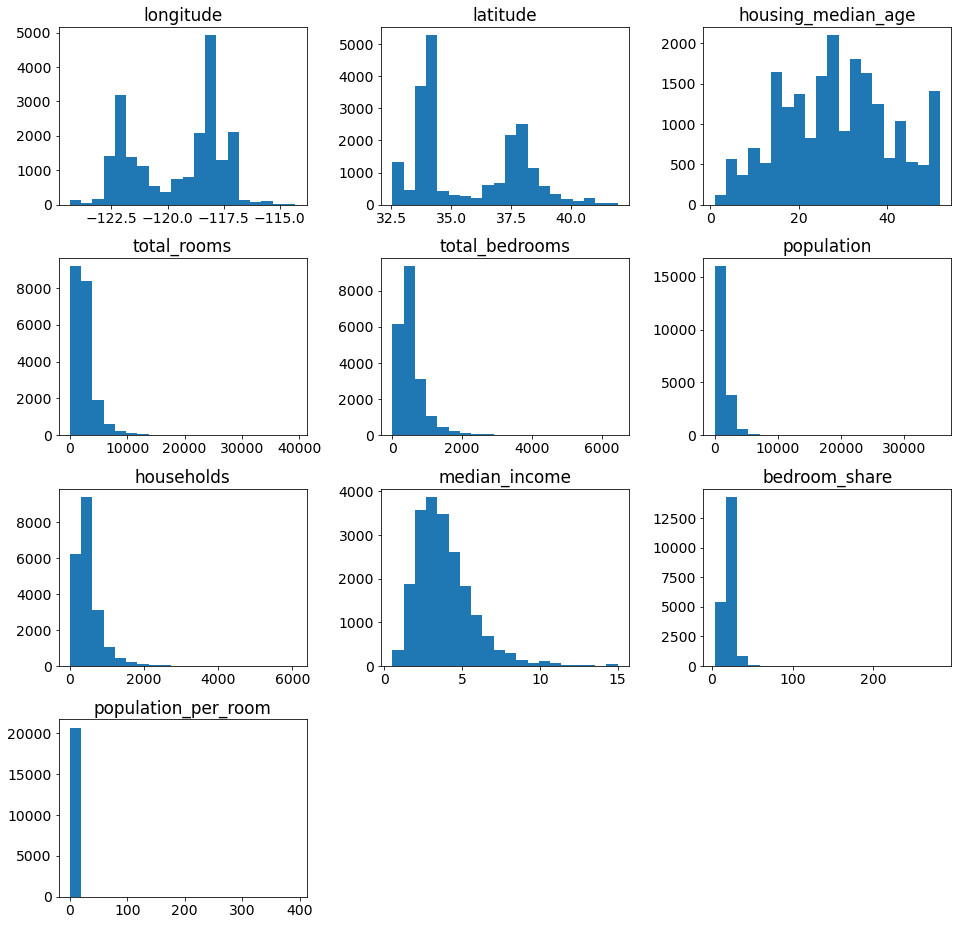

In [19]:
df_num_features.hist(figsize=(16,16), bins=20, grid=False);

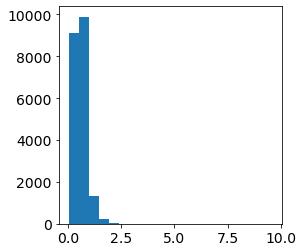

In [20]:
df_num_features.loc[df_num_features['population_per_room'] < 10, 'population_per_room'].\
    hist(figsize=(4,4), bins=20, grid=False);

In [21]:
?sns.jointplot

C:\Users\mas10\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


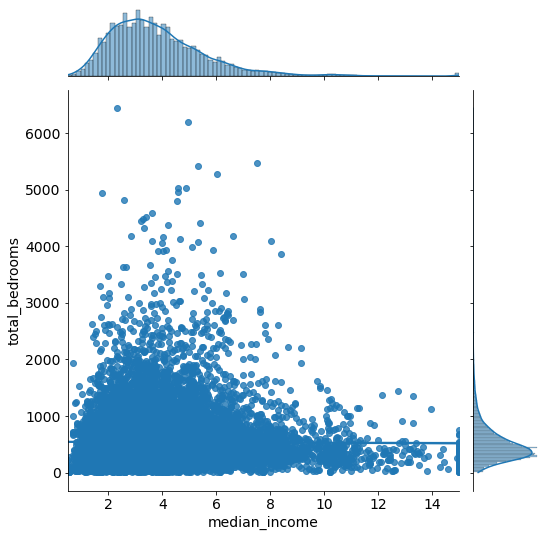

In [22]:
grid = sns.jointplot(df['median_income'], df['total_bedrooms'], kind='reg')
# plt.plot(np.arange(0, 8000, 100), np.arange(0, 8000, 100), color = 'red', linestyle='--')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)

plt.show()

C:\Users\mas10\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


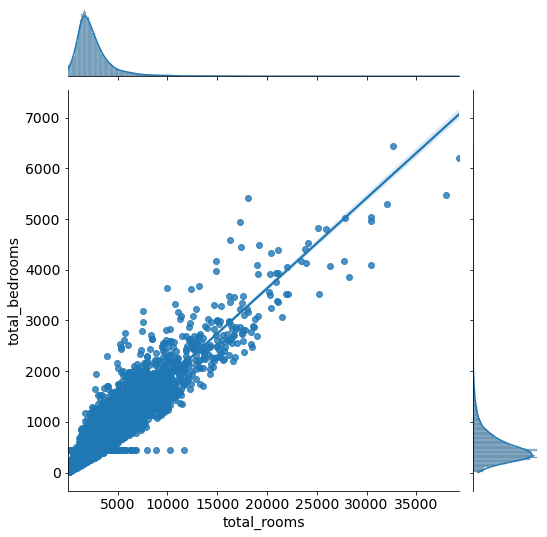

In [23]:
grid = sns.jointplot(df['total_rooms'], df['total_bedrooms'], kind='reg')
# plt.plot(np.arange(0, 8000, 100), np.arange(0, 8000, 100), color = 'red', linestyle='--')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)

plt.show()

In [24]:
df['total_bedrooms'].median()

435.0

In [25]:
df[df['total_bedrooms'] == 435].shape[0] / df.shape[0]

0.011821705426356589

In [26]:
df.shape[0]

20640

In [27]:
df[df['total_bedrooms'] == df['total_bedrooms'].median()].shape[0]

244

C:\Users\mas10\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


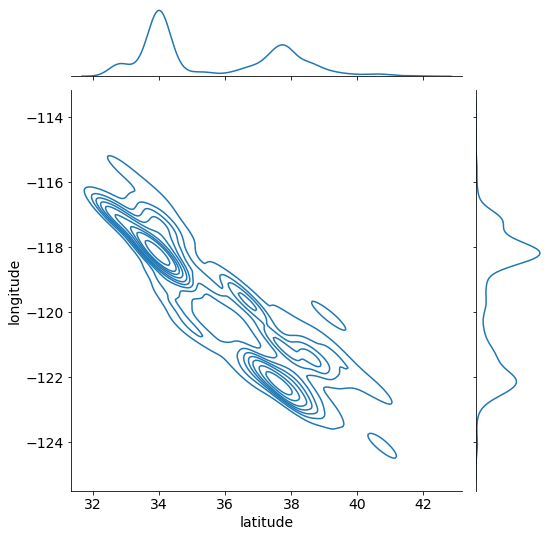

In [28]:
grid = sns.jointplot(df['latitude'], df['longitude'], kind='kde')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)

plt.show()

In [29]:
df['city'] = (df['longitude'] > -120) * 1

In [30]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id,bedroom_share,population_per_room,-,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,city
0,-122.230003,37.880001,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,14.659091,0.365909,0,0,0,0,1,0,0
1,-122.220001,37.860001,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,1,15.579659,0.338217,0,0,0,0,1,0,0
2,-122.239998,37.849998,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,2,12.951602,0.338105,0,0,0,0,1,0,0
3,-122.250000,37.849998,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,3,18.445839,0.437991,0,0,0,0,1,0,0
4,-122.250000,37.849998,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,4,17.209589,0.347265,0,0,0,0,1,0,0


### 2.2 Категориальные признаки

C:\Users\mas10\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


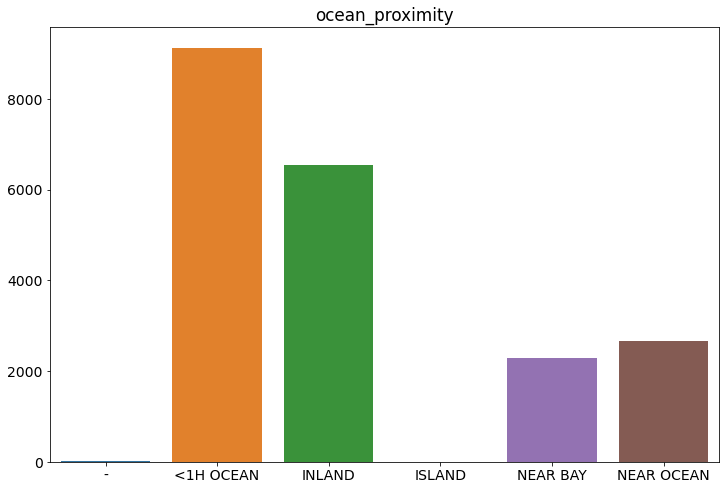

In [31]:
# sns.set(font_scale=1.4)

counts = df['ocean_proximity'].value_counts()
    
plt.figure(figsize=(12,8))    
plt.title('ocean_proximity')
sns.barplot(counts.index, counts.values)
    
plt.show()

### 2.3 Бинарные признаки

In [32]:
df_bin_features = df.select_dtypes(include='int64')

C:\Users\mas10\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


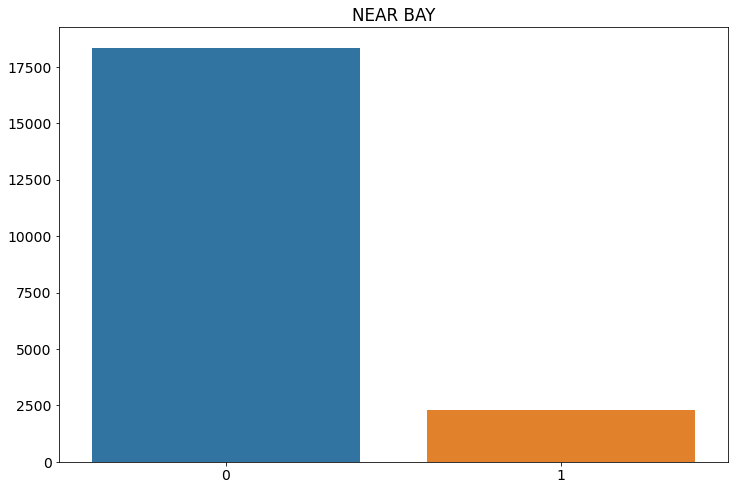

In [33]:
counts = df['NEAR BAY'].value_counts()
    
plt.figure(figsize=(12,8))    
plt.title('NEAR BAY')
sns.barplot(counts.index, counts.values)
    
plt.show()

### 2.4 Матрица корреляций

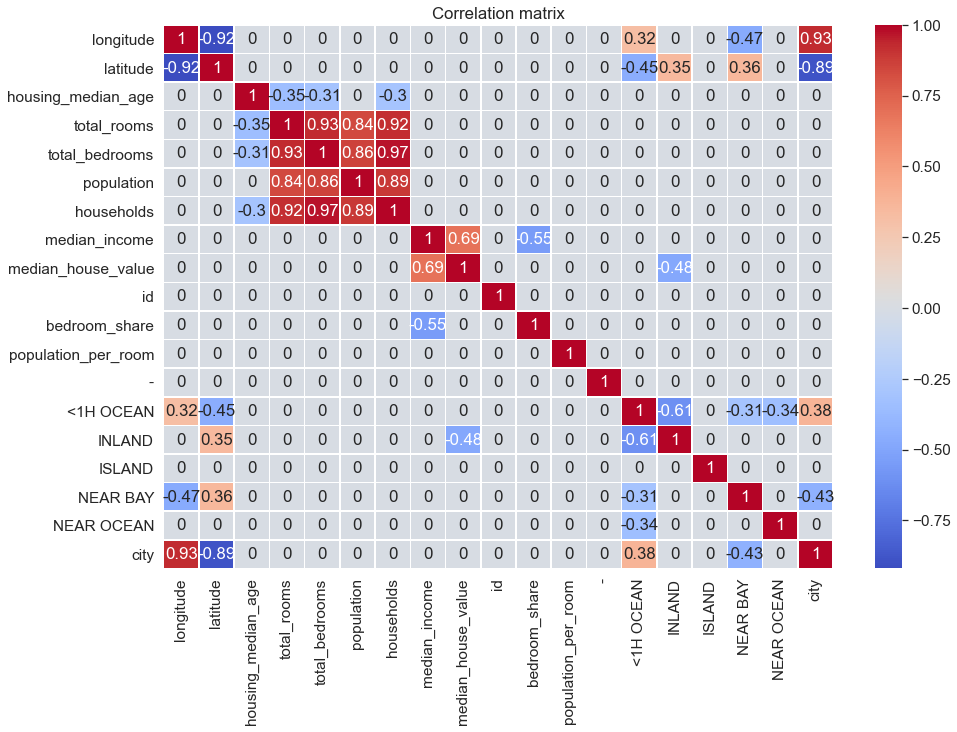

In [34]:
plt.figure(figsize = (15,10))

sns.set(font_scale=1.4)

corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0  # Проверьте, что будет если убрать маленькие корреляции

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

# 3. Анализ зависимости таргета от фичей

## 3.1 Количественные признаки

C:\Users\mas10\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


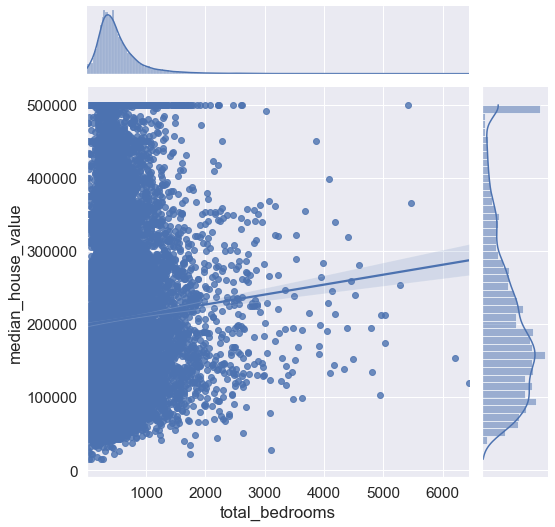

In [35]:
grid = sns.jointplot(df['total_bedrooms'], df['median_house_value'], kind='reg')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)

plt.show()

C:\Users\mas10\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


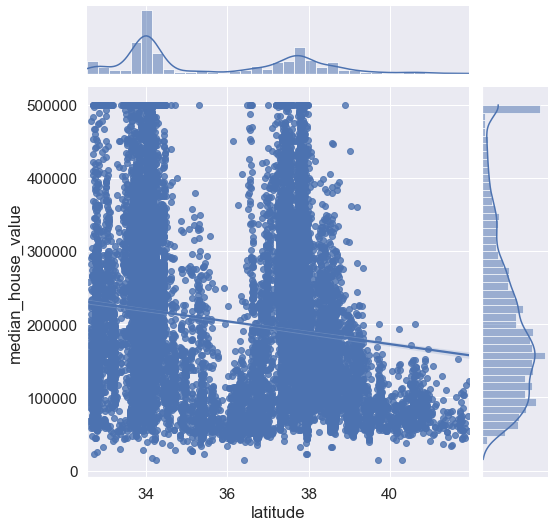

In [36]:
grid = sns.jointplot(df['latitude'], df['median_house_value'], kind='reg')
# plt.plot(np.arange(0, 8000, 100), np.arange(0, 8000, 100), color = 'red', linestyle='--')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)

plt.show()

C:\Users\mas10\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


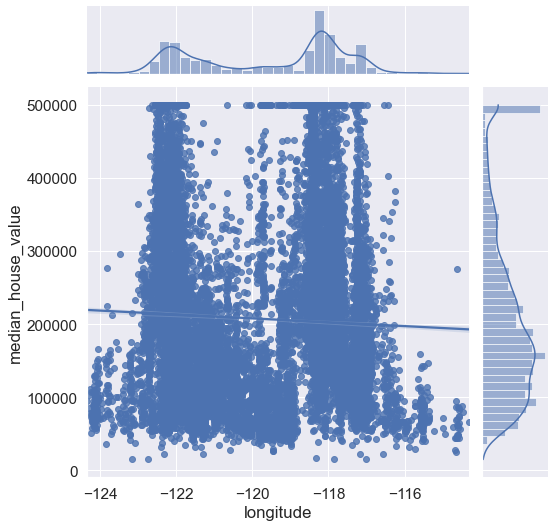

In [37]:
grid = sns.jointplot(df['longitude'], df['median_house_value'], kind='reg')
# plt.plot(np.arange(0, 8000, 100), np.arange(0, 8000, 100), color = 'red', linestyle='--')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)

plt.show()

In [38]:
df['many_bedrooms'] = (df['total_bedrooms'] > 3000) * 1

## 3.2 Категориальные / бинарные признаки

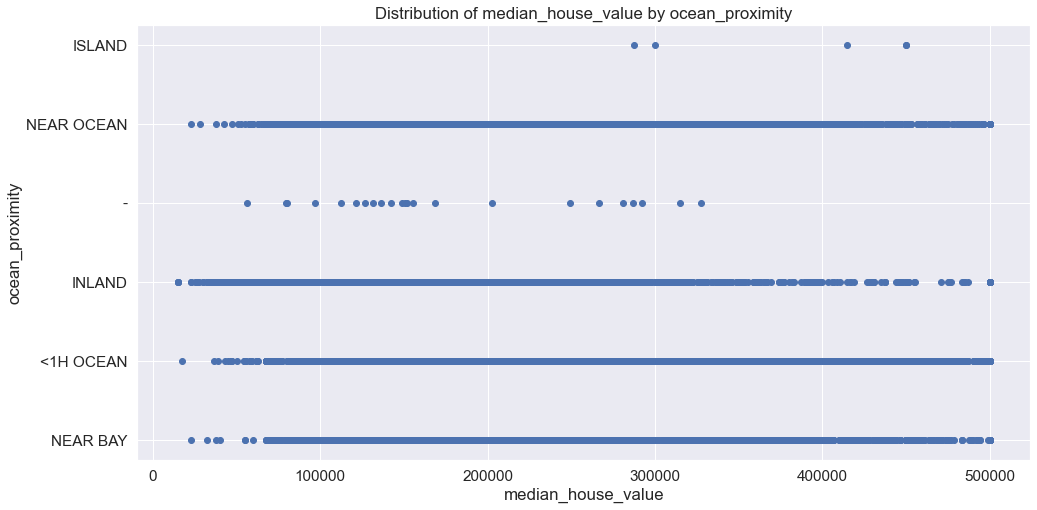

In [39]:
plt.figure(figsize=(16, 8))

plt.scatter(df['median_house_value'], df['ocean_proximity'])

plt.xlabel('median_house_value')
plt.ylabel('ocean_proximity')
plt.title('Distribution of median_house_value by ocean_proximity')
plt.show()

### box plot

C:\Users\mas10\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


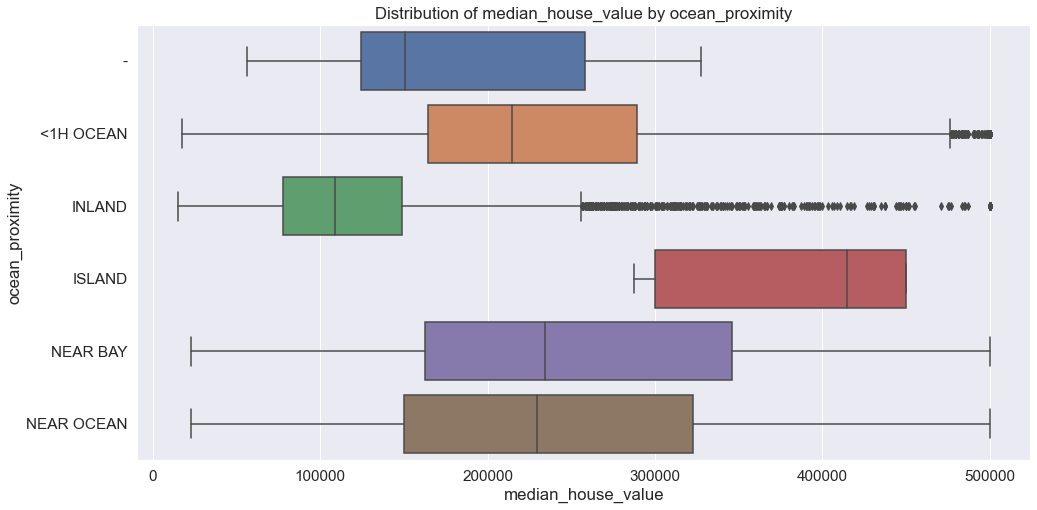

In [40]:
plt.figure(figsize=(16, 8))

sns.boxplot(df['median_house_value'], df['ocean_proximity'])

plt.xlabel('median_house_value')
plt.ylabel('ocean_proximity')
plt.title('Distribution of median_house_value by ocean_proximity')
plt.show()

**Как строится box plot**  

[Подробное объяснение](https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51)

- box - от 25% до 75% квантиля
- линия в середине box - медиана
- "усы"

**Как строятся "усы"** - вариантов масса
- среднее  +/-  3 сигма (стандартное отклонение)
- min / max
- median  +/-  1.5*(q75 - q25), 

*Интерквартильный размах = q75 - q25

### Violin plot

C:\Users\mas10\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


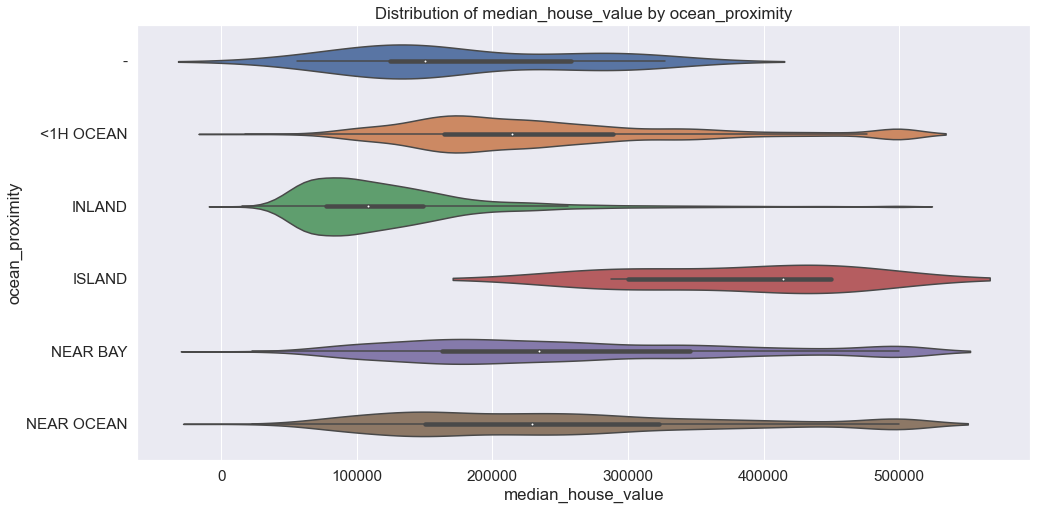

In [41]:
plt.figure(figsize=(16, 8))

sns.violinplot(df['median_house_value'], df['ocean_proximity'])

plt.xlabel('median_house_value')
plt.ylabel('ocean_proximity')
plt.title('Distribution of median_house_value by ocean_proximity')
plt.show()

## 3.3 Гео данные*

Но у нас ведь есть широта и долгота!

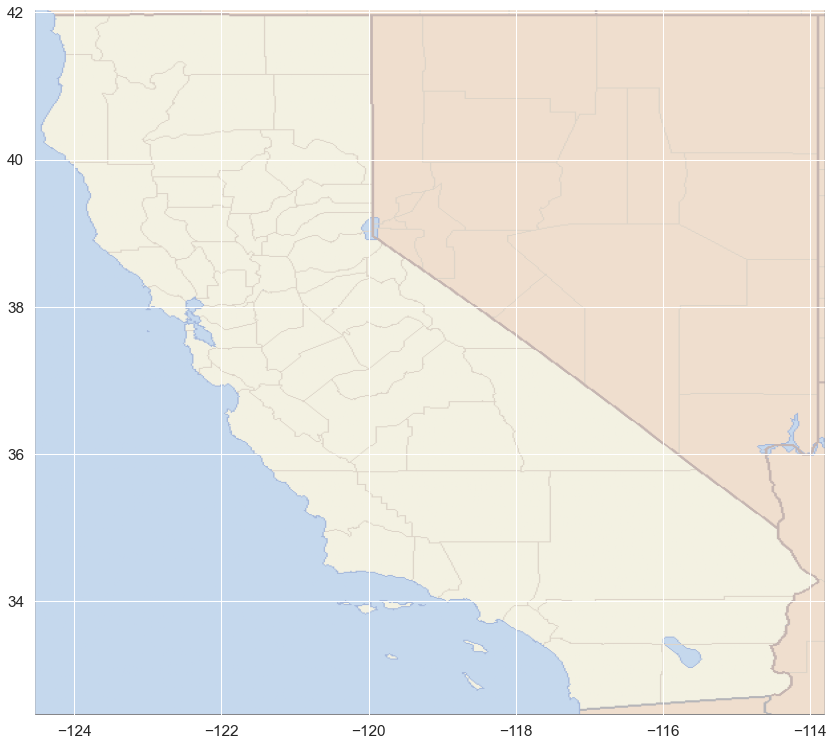

In [42]:
california_map = img.imread(CALIFORNIA_MAP_PATH)

plt.figure(figsize=(20,13))
plt.imshow(california_map, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5)
plt.show()

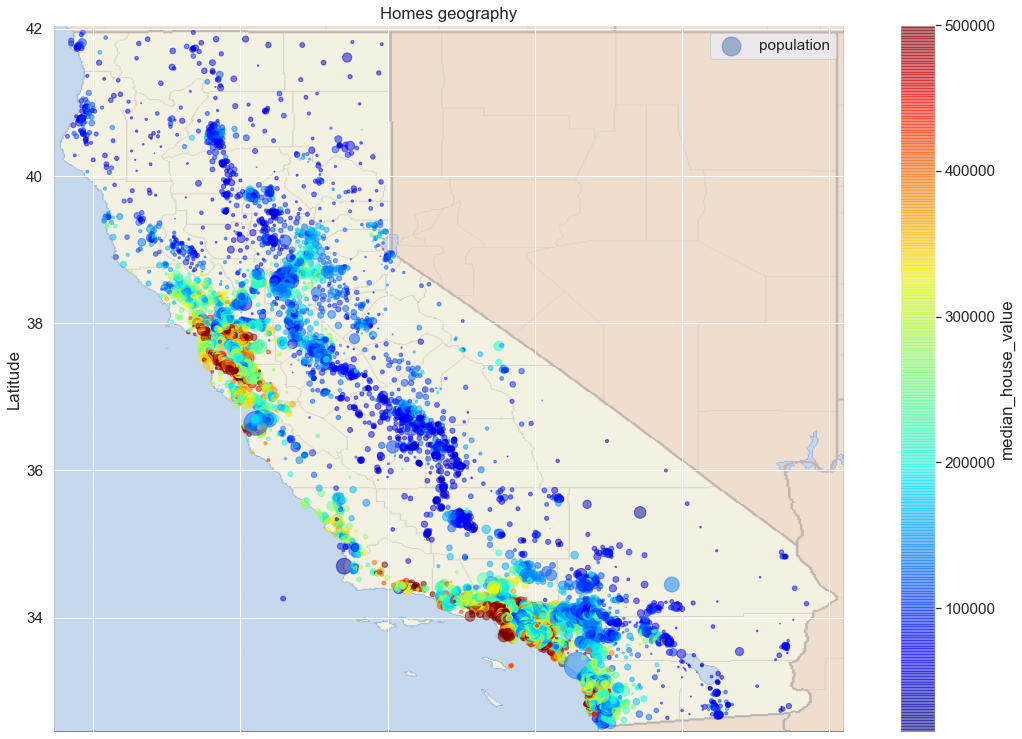

In [43]:
df.plot(kind='scatter', x='longitude', y='latitude', alpha=0.5, 
        s=df['population'] / 50, label='population', c='median_house_value', 
        cmap=plt.get_cmap('jet'), figsize=(20,13))

plt.imshow(california_map, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5)

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Homes geography")
plt.legend() 
plt.show()